In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



Queries to obtain table in format:


In [63]:


cnx = mysql.connector.connect(host='localhost', user='root'
, password='', database='aoe')

query = '''
SELECT 
    tournament.name, 
    match_1v1.id, 
    match_1v1.tournament_id,
    match_1v1.date,
    tournament.prizemoney,
    stage.name AS Knockout_stage,
    stage.importance AS Knockout_stage_importance,
    match_1v1.player_1_id, 
    player1.name AS player_1_name, 
    pe1.elo_before AS elo_player_1,
    match_1v1.score_1,
    match_1v1.player_2_id, 
    player2.name AS player_2_name,  
    pe2.elo_before AS elo_player_2,
    match_1v1.score_2
FROM 
    tournament
INNER JOIN 
    match_1v1 ON tournament.id = match_1v1.tournament_id
INNER JOIN
    player_cache AS cache1 ON match_1v1.player_1_id = cache1.player_id
INNER JOIN 
    player AS player1 ON cache1.player_id = player1.id
INNER JOIN 
    player_cache AS cache2 ON match_1v1.player_2_id = cache2.player_id
INNER JOIN 
    player AS player2 ON cache2.player_id = player2.id
INNER JOIN
	stage ON match_1v1.stage_id = stage.id
INNER JOIN 
    elo_1v1_cache AS pe1 ON match_1v1.id = pe1.match_id AND match_1v1.player_1_id = pe1.player_id
INNER JOIN 
    elo_1v1_cache AS pe2 ON match_1v1.id = pe2.match_id AND match_1v1.player_2_id = pe2.player_id
WHERE 
    tournament.name LIKE '%Hidden Cup%';
'''

query1 = '''
SELECT 
    tournament.name, 
    match_1v1.id, 
    match_1v1.tournament_id,
    match_1v1.date,
    tournament.prizemoney,
    stage.name AS Knockout_stage,
    stage.importance AS Knockout_stage_importance,
    match_1v1.player_1_id, 
    player1.name AS player_1_name, 
    pe1.elo_before AS elo_player_1,
    match_1v1.score_1,
    match_1v1.player_2_id, 
    player2.name AS player_2_name,  
    pe2.elo_before AS elo_player_2,
    match_1v1.score_2
FROM 
    tournament
INNER JOIN 
    match_1v1 ON tournament.id = match_1v1.tournament_id
INNER JOIN
    player_cache AS cache1 ON match_1v1.player_1_id = cache1.player_id
INNER JOIN 
    player AS player1 ON cache1.player_id = player1.id
INNER JOIN 
    player_cache AS cache2 ON match_1v1.player_2_id = cache2.player_id
INNER JOIN 
    player AS player2 ON cache2.player_id = player2.id
INNER JOIN
	stage ON match_1v1.stage_id = stage.id
INNER JOIN 
    elo_1v1_cache AS pe1 ON match_1v1.id = pe1.match_id AND match_1v1.player_1_id = pe1.player_id
INNER JOIN 
    elo_1v1_cache AS pe2 ON match_1v1.id = pe2.match_id AND match_1v1.player_2_id = pe2.player_id
WHERE 
    tournament.name NOT LIKE '%Hidden Cup%';
'''

dfh = pd.read_sql(query, cnx)
df = pd.read_sql(query1, cnx)

cnx.close()



/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/2768250772.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfh = pd.read_sql(query, cnx)
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/2768250772.py:83: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query1, cnx)


In [64]:
dfh

,name,id,tournament_id,date,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2
0,Hidden Cup,222,7,None,1440.0,K.O. Phase,1,1,DauT,2077,1,2,miguel,1984,3
1,Hidden Cup,223,7,None,1440.0,K.O. Phase,1,27,Nicov,2102,3,31,TaToH,2154,1
2,Hidden Cup,224,7,None,1440.0,K.O. Phase,1,19,Yo,2153,2,3,RiuT,2207,3
3,Hidden Cup,225,7,None,1440.0,K.O. Phase,1,5,F1Re,2071,3,35,vivi,2072,1
4,Hidden Cup 2 Qualifiers,1286,89,2019-03-08,0.0,K.O. Phase,1,62,LaaaaaN,1996,3,54,yinghua,2031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Hidden Cup V Qualifier,13319,669,2024-02-11,NaN,Finale (Loser Bracket),3,499,Sobek,2107,0,878,Mihai06,2195,4
293,Hidden Cup V Qualifier,13320,669,2024-02-11,NaN,Finale (Loser Bracket),3,851,Babaorum,2177,1,26,Hearttt,2298,4
294,Hidden Cup Italia,5239,284,2021-05-16,947.0,Bronze-Match,3,503,pete_martell,1990,2,446,Kamigawa,1989,3
295,Hidden Cup 5,13354,674,2024-03-03,70624.0,Bronze-Match,3,14,ACCM,2379,1,29,TheViper,2446,3


In [3]:
dfh
#we remove rows with qualifier since those are not really hidden
filt = (dfh['name'].str.contains('Qualifier'))
dfh = dfh[~filt]



In [4]:
dfh.describe()

,id,tournament_id,prizemoney,Knockout_stage_importance,player_1_id,elo_player_1,score_1,player_2_id,elo_player_2,score_2
count,110.000000,110.000000,87.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,7144.036364,369.354545,30113.655172,1.954545,257.054545,2143.481818,2.318182,338.327273,2120.009091,1.945455
std,5337.263440,264.700162,36831.414804,0.961520,402.559742,157.428052,1.312829,458.082163,147.839207,1.413152
min,222.000000,7.000000,154.000000,1.000000,1.000000,1858.000000,0.000000,1.000000,1889.000000,0.000000
25%,2889.250000,163.000000,600.500000,1.000000,24.000000,2023.000000,1.000000,25.000000,1991.250000,1.000000
50%,4769.500000,253.000000,10200.000000,2.000000,30.000000,2132.500000,3.000000,31.000000,2093.500000,2.000000
75%,12957.750000,657.000000,70624.000000,3.000000,446.000000,2241.250000,3.000000,727.500000,2212.750000,3.000000
max,13550.000000,689.000000,87240.000000,4.000000,1603.000000,2527.000000,5.000000,1639.000000,2461.000000,4.000000


In [5]:
dfh['name'].nunique()

9

We add s-tier and hidden column

In [6]:
dfh['s-tier'] = True
dfh['hidden'] = dfh['name'].str.contains('Hidden Cup')
dfh

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,s-tier,hidden
0,Hidden Cup,222,7,1440.0,K.O. Phase,1,1,DauT,2077,1,2,miguel,1984,3,True,True
1,Hidden Cup,223,7,1440.0,K.O. Phase,1,27,Nicov,2102,3,31,TaToH,2154,1,True,True
2,Hidden Cup,224,7,1440.0,K.O. Phase,1,19,Yo,2153,2,3,RiuT,2207,3,True,True
3,Hidden Cup,225,7,1440.0,K.O. Phase,1,5,F1Re,2071,3,35,vivi,2072,1,True,True
12,Hidden Cup 2,1312,88,10200.0,K.O. Phase,1,19,Yo,2140,3,31,TaToH,2180,2,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Hidden Cup 5,13355,674,70624.0,Finale,4,28,Hera,2523,4,25,Liereyy,2399,0,True,True
290,Hidden Cup Türkiye,13514,689,NaN,Finale,4,195,Kasva,2101,5,886,Dr.Kozmonot,2052,3,True,True
294,Hidden Cup Italia,5239,284,947.0,Bronze-Match,3,503,pete_martell,1990,2,446,Kamigawa,1989,3,True,True
295,Hidden Cup 5,13354,674,70624.0,Bronze-Match,3,14,ACCM,2379,1,29,TheViper,2446,3,True,True


First look at underdog, column to mark whether a player is an underdog

In [7]:

def checkifUnderdogwins(row, threshold):
    if abs(row['elo_player_1']-row['elo_player_2']) > threshold:
        if min(row['elo_player_1'],row['elo_player_2']) == row['elo_player_1']:
            return row['score_1'] > row['score_2']
        else:
            return row['score_2'] > row['score_1']
    else:
        return False



/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


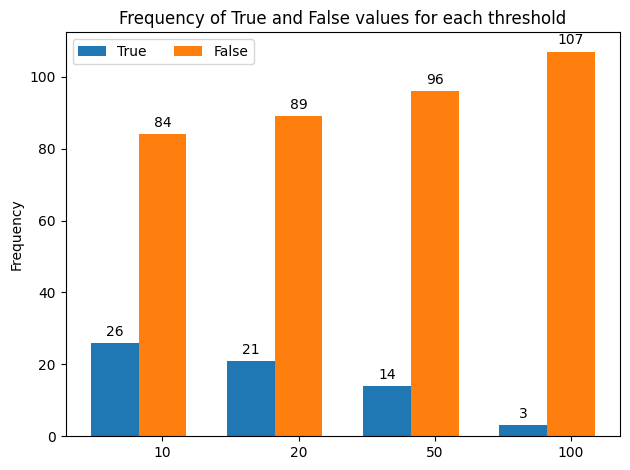

[[26, 84], [21, 89], [14, 96], [3, 107]]


In [8]:
thresholds = [10,20,50,100]
def createplot(df,thresholds):
    data = []
    for threshold in thresholds:
        df['Underdog'] = df.apply(checkifUnderdogwins, axis=1, args=(threshold,))
        val = df['Underdog'].value_counts()
        false = val[False]
        true = val[True]
        arr = [true, false]
        data.append(arr)



    species = ("10", "20", "50", "100")

    x = np.arange(len(species))  # the label locations
    width = 0.35  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    data1 = {
        "True": [data[i][0] for i in range(len(species))],
        "False": [data[i][1] for i in range(len(species))]
    }
    for attribute, measurement in data1.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of True and False values for each threshold')
    ax.set_xticks(x + width, species)
    ax.legend(loc='upper left', ncols=4)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    
    return data
    
data = createplot(dfh,thresholds)
print(data)


Same for other tournaments


In [9]:
df

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2
0,Arabia Invitational,1,15,3000.0,Group Stage,1,29,TheViper,2282,3,18,St4rk,2051,2
1,Arabia Invitational,2,15,3000.0,Group Stage,1,50,Zuppi,2039,3,28,Hera,1999,2
2,Arabia Invitational,3,15,3000.0,Group Stage,1,35,vivi,1992,2,54,yinghua,2054,3
3,Arabia Invitational,4,15,3000.0,Group Stage,1,29,TheViper,2276,3,50,Zuppi,2043,2
4,Arabia Invitational,5,15,3000.0,Group Stage,1,18,St4rk,2057,3,35,vivi,1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,NAC CORP,13313,673,NaN,Semi-Finals (Winner Bracket),1,1049,Nahuel05_,2034,2,1319,Parawhas,1971,0
12993,Swidden Cup,13447,685,NaN,Semi-Finals (Winner Bracket),1,1635,Yakul,1900,1,1636,Kr1lle,1900,3
12994,Swidden Cup,13448,685,NaN,Semi-Finals (Winner Bracket),1,65,Spaden,1951,2,731,mratin,1983,3
12995,India 1v1 Cup,13500,686,NaN,Semi-Finals (Winner Bracket),1,603,The_Dragonstar,2147,2,1637,Ass_Kickerwa,1904,0


/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


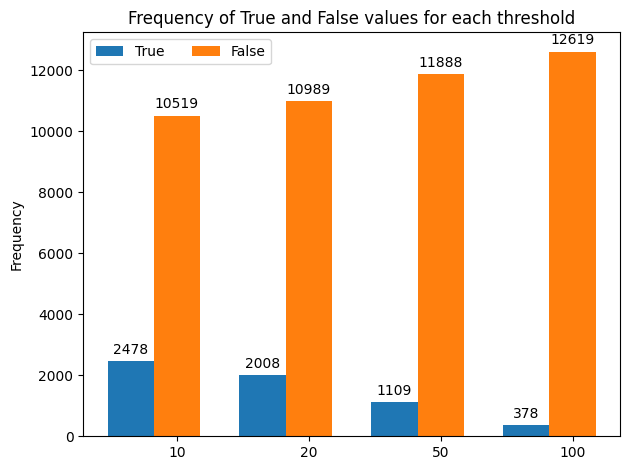

[[2478, 10519], [2008, 10989], [1109, 11888], [378, 12619]]

In [10]:
createplot(df,thresholds)

# S tier


In [11]:

import re

stier = []

with open('../data/s-tier.txt') as f:
    for line in f:
        stier.append(line.strip())
# Create a regex pattern to match any of the names in s-tier list
pattern = '|'.join(stier)
regex = re.compile(pattern)

# Check if the names in the DataFrame match the regex pattern
df['s-tier'] = df['name'].apply(lambda x: bool(regex.search(x)))

df_stier = df[df['s-tier'] == True]
df_stier





,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier
50,Nili's Apartment Cup 1,156,6,2500.0,Group Stage,1,31,TaToH,2186,1,29,TheViper,2322,4,False,True
51,Nili's Apartment Cup 1,157,6,2500.0,Group Stage,1,30,JorDan_23,2165,1,24,MbL,2071,4,False,True
52,Nili's Apartment Cup 1,158,6,2500.0,Group Stage,1,25,Liereyy,2128,4,1,DauT,2131,1,False,True
53,Nili's Apartment Cup 1,159,6,2500.0,Group Stage,1,24,MbL,2088,2,25,Liereyy,2140,4,False,True
54,Nili's Apartment Cup 1,160,6,2500.0,Group Stage,1,1,DauT,2119,0,31,TaToH,2179,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,RMS Cup 2,8260,405,18400.0,Quarter-Finals (Winner Bracket),1,28,Hera,2353,3,30,JorDan_23,2302,1,False,True
12915,World Cyber Games 2002,2097,136,43000.0,Semi-Finals (Winner Bracket),1,386,Play_Boys,2023,1,274,Chunyu,2033,0,False,True
12916,World Cyber Games 2002,2098,136,43000.0,Semi-Finals (Winner Bracket),1,371,RIP_DREAMS,2010,0,210,Halen,2050,1,False,True
12917,World Cyber Games 2001,2172,142,35000.0,Semi-Finals (Winner Bracket),1,60,Chris,2023,0,373,IamKmkm,2017,1,False,True


/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Underdog'] = df.apply(checkifUnderdogwins, axis=1, args=(threshold,))
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


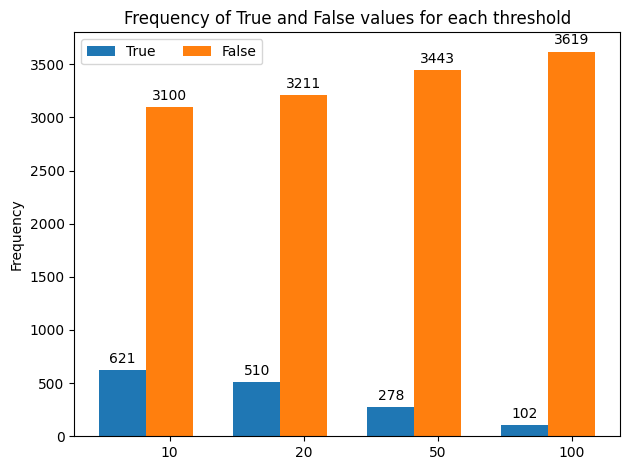

[[621, 3100], [510, 3211], [278, 3443], [102, 3619]]

In [12]:
createplot(df_stier,thresholds)

In [13]:
df_stier['hidden'] = df_stier['name'].str.contains('Hidden Cup')
df_stier

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/4027625433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stier['hidden'] = df_stier['name'].str.contains('Hidden Cup')


,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier,hidden
50,Nili's Apartment Cup 1,156,6,2500.0,Group Stage,1,31,TaToH,2186,1,29,TheViper,2322,4,False,True,False
51,Nili's Apartment Cup 1,157,6,2500.0,Group Stage,1,30,JorDan_23,2165,1,24,MbL,2071,4,False,True,False
52,Nili's Apartment Cup 1,158,6,2500.0,Group Stage,1,25,Liereyy,2128,4,1,DauT,2131,1,False,True,False
53,Nili's Apartment Cup 1,159,6,2500.0,Group Stage,1,24,MbL,2088,2,25,Liereyy,2140,4,False,True,False
54,Nili's Apartment Cup 1,160,6,2500.0,Group Stage,1,1,DauT,2119,0,31,TaToH,2179,4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,RMS Cup 2,8260,405,18400.0,Quarter-Finals (Winner Bracket),1,28,Hera,2353,3,30,JorDan_23,2302,1,False,True,False
12915,World Cyber Games 2002,2097,136,43000.0,Semi-Finals (Winner Bracket),1,386,Play_Boys,2023,1,274,Chunyu,2033,0,False,True,False
12916,World Cyber Games 2002,2098,136,43000.0,Semi-Finals (Winner Bracket),1,371,RIP_DREAMS,2010,0,210,Halen,2050,1,False,True,False
12917,World Cyber Games 2001,2172,142,35000.0,Semi-Finals (Winner Bracket),1,60,Chris,2023,0,373,IamKmkm,2017,1,False,True,False


Combinamos las dos tablas de hidden y de torneos s-tier

In [14]:
frames = [dfh, df_stier]
dfa = pd.concat(frames)
dfa

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,s-tier,hidden,Underdog
0,Hidden Cup,222,7,1440.0,K.O. Phase,1,1,DauT,2077,1,2,miguel,1984,3,True,True,False
1,Hidden Cup,223,7,1440.0,K.O. Phase,1,27,Nicov,2102,3,31,TaToH,2154,1,True,True,False
2,Hidden Cup,224,7,1440.0,K.O. Phase,1,19,Yo,2153,2,3,RiuT,2207,3,True,True,False
3,Hidden Cup,225,7,1440.0,K.O. Phase,1,5,F1Re,2071,3,35,vivi,2072,1,True,True,False
12,Hidden Cup 2,1312,88,10200.0,K.O. Phase,1,19,Yo,2140,3,31,TaToH,2180,2,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,RMS Cup 2,8260,405,18400.0,Quarter-Finals (Winner Bracket),1,28,Hera,2353,3,30,JorDan_23,2302,1,True,False,False
12915,World Cyber Games 2002,2097,136,43000.0,Semi-Finals (Winner Bracket),1,386,Play_Boys,2023,1,274,Chunyu,2033,0,True,False,False
12916,World Cyber Games 2002,2098,136,43000.0,Semi-Finals (Winner Bracket),1,371,RIP_DREAMS,2010,0,210,Halen,2050,1,True,False,False
12917,World Cyber Games 2001,2172,142,35000.0,Semi-Finals (Winner Bracket),1,60,Chris,2023,0,373,IamKmkm,2017,1,True,False,False


torneos que no son s-tier


In [15]:
df_tier = df[df['s-tier'] == False]
df_tier

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier
0,Arabia Invitational,1,15,3000.0,Group Stage,1,29,TheViper,2282,3,18,St4rk,2051,2,False,False
1,Arabia Invitational,2,15,3000.0,Group Stage,1,50,Zuppi,2039,3,28,Hera,1999,2,False,False
2,Arabia Invitational,3,15,3000.0,Group Stage,1,35,vivi,1992,2,54,yinghua,2054,3,False,False
3,Arabia Invitational,4,15,3000.0,Group Stage,1,29,TheViper,2276,3,50,Zuppi,2043,2,False,False
4,Arabia Invitational,5,15,3000.0,Group Stage,1,18,St4rk,2057,3,35,vivi,1993,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,NAC CORP,13313,673,NaN,Semi-Finals (Winner Bracket),1,1049,Nahuel05_,2034,2,1319,Parawhas,1971,0,False,False
12993,Swidden Cup,13447,685,NaN,Semi-Finals (Winner Bracket),1,1635,Yakul,1900,1,1636,Kr1lle,1900,3,False,False
12994,Swidden Cup,13448,685,NaN,Semi-Finals (Winner Bracket),1,65,Spaden,1951,2,731,mratin,1983,3,False,False
12995,India 1v1 Cup,13500,686,NaN,Semi-Finals (Winner Bracket),1,603,The_Dragonstar,2147,2,1637,Ass_Kickerwa,1904,0,False,False


In [16]:
res = df_tier.groupby('tournament_id')['name'].count()
res.describe()

count    593.000000
mean      15.642496
std       17.110640
min        1.000000
25%        4.000000
50%        8.000000
75%       19.000000
max       96.000000
Name: name, dtype: float64

# Data analysis


## We obtain data from matches


In [17]:
#promedio de puntos por jugador en hidden cup
res = (dfh['score_1'].sum() + dfh['score_2'].sum())/(2*len(dfh))
#promedio de puntos por jugador s-tier
res = (df_stier['score_1'].sum() + df_stier['score_2'].sum())/(2*len(df_stier))
#promedio de puntos por jugador no s-tier
res = (df_tier['score_1'].sum() + df_tier['score_2'].sum())/(2*len(df_tier))




tournaments

In [18]:
''' Hidden '''
#average matches per hidden tournament
df_stier.groupby('name').size().mean()
#average elo per hidden tournament
(df_stier['elo_player_1'].mean() + df_stier['elo_player_2'].mean()) / 2
#average elo per hidden tournament
(df_tier['elo_player_1'].mean() + df_tier['elo_player_2'].mean()) / 2



''' S-tier '''
#average matches per s-tier tournament
df_stier.groupby('name').size().mean()
#average elo per s-tier tournament
(df_stier['elo_player_1'].mean() + df_stier['elo_player_2'].mean()) / 2
#elo quartile
(df_stier['elo_player_1'].quantile([0.25,0.5,0.75]) + df_stier['elo_player_2'].quantile([0.25,0.5,0.75])) / 2
#print((df_stier['elo_player_1'].quantile([0.25,0.5,0.75]) + df_stier['elo_player_2'].quantile([0.25,0.5,0.75])) / 2)
#elo standard deviation
#print((df_stier['elo_player_1'].std() + df_stier['elo_player_2'].std()) / 2)


''' Normal '''
#average elo per non s-tier tournament
(df_tier['elo_player_1'].mean() + df_tier['elo_player_2'].mean()) / 2
print((df_tier['elo_player_1'].std() + df_tier['elo_player_2'].std()) / 2)

# Assuming df_tier is your DataFrame containing elo_player_1 and elo_player_2 columns

# Concatenate the two columns
concatenated_column = pd.concat([df_tier['elo_player_1'], df_tier['elo_player_2']])

# Calculate the standard deviation
std_concatenated = concatenated_column.std()

print("Standard Deviation of concatenated column:", std_concatenated)


109.8551107702221
Standard Deviation of concatenated column: 112.42194053390935


In [19]:
res = (df_stier['elo_player_1'].quantile([0.25,0.5,0.75]) + df_stier['elo_player_2'].quantile([0.25,0.5,0.75])) / 2
#acces quantile .25
res

0.25    1999.0
0.50    2079.0
0.75    2201.5
dtype: float64

In [61]:
df_stier.to_csv('s-tier.csv', index=False)

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier,hidden
50,Nili's Apartment Cup 1,156,6,2500.0,Group Stage,1,31,TaToH,2186,1,29,TheViper,2322,4,False,True,False
51,Nili's Apartment Cup 1,157,6,2500.0,Group Stage,1,30,JorDan_23,2165,1,24,MbL,2071,4,False,True,False
52,Nili's Apartment Cup 1,158,6,2500.0,Group Stage,1,25,Liereyy,2128,4,1,DauT,2131,1,False,True,False
53,Nili's Apartment Cup 1,159,6,2500.0,Group Stage,1,24,MbL,2088,2,25,Liereyy,2140,4,False,True,False
54,Nili's Apartment Cup 1,160,6,2500.0,Group Stage,1,1,DauT,2119,0,31,TaToH,2179,4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,RMS Cup 2,8260,405,18400.0,Quarter-Finals (Winner Bracket),1,28,Hera,2353,3,30,JorDan_23,2302,1,False,True,False
12915,World Cyber Games 2002,2097,136,43000.0,Semi-Finals (Winner Bracket),1,386,Play_Boys,2023,1,274,Chunyu,2033,0,False,True,False
12916,World Cyber Games 2002,2098,136,43000.0,Semi-Finals (Winner Bracket),1,371,RIP_DREAMS,2010,0,210,Halen,2050,1,False,True,False
12917,World Cyber Games 2001,2172,142,35000.0,Semi-Finals (Winner Bracket),1,60,Chris,2023,0,373,IamKmkm,2017,1,False,True,False


In [20]:
import pandas as pd

# Create a MultiIndex
index = pd.MultiIndex.from_product([['Normal', 's-tier', 'hidden'], ['Prize_Money', 'Elo','Match_num']],
                                   names=['Tier', 'Attribute'])

# Create an empty DataFrame with the MultiIndex
df = pd.DataFrame(index=index, columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Display the DataFrame
df


mean  std  min  25%  50%  75%  max
Tier   Attribute                                     
Normal Prize_Money  NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Elo          NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Match_num    NaN  NaN  NaN  NaN  NaN  NaN  NaN
s-tier Prize_Money  NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Elo          NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Match_num    NaN  NaN  NaN  NaN  NaN  NaN  NaN
hidden Prize_Money  NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Elo          NaN  NaN  NaN  NaN  NaN  NaN  NaN
       Match_num    NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [21]:
#normal tournaments data
##prize money
df_tier['prizemoney'].describe()
df.loc[('Normal', 'Prize_Money')] = df_tier['prizemoney'].describe()[1:].round(2)
##elo
elos = pd.concat([df_tier['elo_player_1'], df_tier['elo_player_2']])
df.loc[('Normal', 'Elo')] = elos.describe()
##match_num obtain mean number of matches per tournament ass well as std and quartiles
res = df_tier.groupby('tournament_id')['name'].count()
df.loc[('Normal','Match_num')]= res.describe()

df







mean         std     min     25%     50%     75%  \
Tier   Attribute                                                              
Normal Prize_Money      2226.32     6314.78     0.0   225.0   700.0  2000.0   
       Elo          2043.413918  112.421941  1828.0  1971.0  2009.0  2102.0   
       Match_num      15.642496    17.11064     1.0     4.0     8.0    19.0   
s-tier Prize_Money          NaN         NaN     NaN     NaN     NaN     NaN   
       Elo                  NaN         NaN     NaN     NaN     NaN     NaN   
       Match_num            NaN         NaN     NaN     NaN     NaN     NaN   
hidden Prize_Money          NaN         NaN     NaN     NaN     NaN     NaN   
       Elo                  NaN         NaN     NaN     NaN     NaN     NaN   
       Match_num            NaN         NaN     NaN     NaN     NaN     NaN   

                         max  
Tier   Attribute              
Normal Prize_Money  100000.0  
       Elo            2541.0  
       Match_num        96.0  
s-tier Prize_Money       NaN  
       Elo               NaN  
       Match_num         NaN  
hidden Prize_Money       NaN  
       Elo               NaN  
       Match_num         NaN

In [22]:
#normal tournaments data
##prize money
df_stier['prizemoney'].describe()
df.loc[('s-tier', 'Prize_Money')] = df_stier['prizemoney'].describe()[1:].round(2)
##elo
elos = pd.concat([df_stier['elo_player_1'], df_stier['elo_player_2']])
df.loc[('s-tier', 'Elo')] = elos.describe()
##match_num obtain mean number of matches per tournament ass well as std and quartiles
res = df_stier.groupby('tournament_id')['name'].count()
df.loc[('s-tier','Match_num')]= res.describe()

df


mean         std     min     25%      50%      75%  \
Tier   Attribute                                                                
Normal Prize_Money      2226.32     6314.78     0.0   225.0    700.0   2000.0   
       Elo          2043.413918  112.421941  1828.0  1971.0   2009.0   2102.0   
       Match_num      15.642496    17.11064     1.0     4.0      8.0     19.0   
s-tier Prize_Money     24891.94    31765.66   500.0  2400.0  17300.0  35000.0   
       Elo          2103.328944  140.156388  1848.0  1995.0   2084.0   2198.0   
       Match_num      49.613333   31.805105     4.0    27.0     44.0     60.0   
hidden Prize_Money          NaN         NaN     NaN     NaN      NaN      NaN   
       Elo                  NaN         NaN     NaN     NaN      NaN      NaN   
       Match_num            NaN         NaN     NaN     NaN      NaN      NaN   

                         max  
Tier   Attribute              
Normal Prize_Money  100000.0  
       Elo            2541.0  
       Match_num        96.0  
s-tier Prize_Money  200000.0  
       Elo            2514.0  
       Match_num       155.0  
hidden Prize_Money       NaN  
       Elo               NaN  
       Match_num         NaN

In [23]:
#normal tournaments data
##prize money
dfh['prizemoney'].describe()
df.loc[('hidden', 'Prize_Money')] = dfh['prizemoney'].describe()[1:].round(2)
##elo
elos = pd.concat([dfh['elo_player_1'], dfh['elo_player_2']])
df.loc[('hidden', 'Elo')] = elos.describe()
##match_num obtain mean number of matches per tournament ass well as std and quartiles
res = dfh.groupby('tournament_id')['name'].count()
df.loc[('hidden','Match_num')]= res.describe()

df


mean         std     min     25%      50%      75%  \
Tier   Attribute                                                                
Normal Prize_Money      2226.32     6314.78     0.0   225.0    700.0   2000.0   
       Elo          2043.413918  112.421941  1828.0  1971.0   2009.0   2102.0   
       Match_num      15.642496    17.11064     1.0     4.0      8.0     19.0   
s-tier Prize_Money     24891.94    31765.66   500.0  2400.0  17300.0  35000.0   
       Elo          2103.328944  140.156388  1848.0  1995.0   2084.0   2198.0   
       Match_num      49.613333   31.805105     4.0    27.0     44.0     60.0   
hidden Prize_Money     30113.66    36831.41   154.0   600.5  10200.0  70624.0   
       Elo          2131.745455  152.813279  1858.0  1997.5   2108.0   2214.0   
       Match_num      12.222222    3.700601     7.0     8.0     15.0     15.0   

                         max  
Tier   Attribute              
Normal Prize_Money  100000.0  
       Elo            2541.0  
       Match_num        96.0  
s-tier Prize_Money  200000.0  
       Elo            2514.0  
       Match_num       155.0  
hidden Prize_Money   87240.0  
       Elo            2527.0  
       Match_num        16.0

# Players

In [24]:
cnx = mysql.connector.connect(host='localhost', user='root'
, password='mauricio02', database='age')

query = '''
Select *
from player_cache

'''

players = pd.read_sql(query, cnx)

cnx.close()

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3713335456.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  players = pd.read_sql(query, cnx)


In [54]:

cnx = mysql.connector.connect(host='localhost', user='root'
, password='', database='aoe')


query = '''
SELECT 
    tournament.name, 
    match_1v1.id, 
    match_1v1.tournament_id,
    match_1v1.date,
    tournament.prizemoney,
    stage.name AS Knockout_stage,
    stage.importance AS Knockout_stage_importance,
    match_1v1.player_1_id, 
    player1.name AS player_1_name, 
    pe1.elo_before AS elo_player_1,
    match_1v1.score_1,
    match_1v1.player_2_id, 
    player2.name AS player_2_name,  
    pe2.elo_before AS elo_player_2,
    match_1v1.score_2
FROM 
    tournament
INNER JOIN 
    match_1v1 ON tournament.id = match_1v1.tournament_id
INNER JOIN
    player_cache AS cache1 ON match_1v1.player_1_id = cache1.player_id
INNER JOIN 
    player AS player1 ON cache1.player_id = player1.id
INNER JOIN 
    player_cache AS cache2 ON match_1v1.player_2_id = cache2.player_id
INNER JOIN 
    player AS player2 ON cache2.player_id = player2.id
INNER JOIN
	stage ON match_1v1.stage_id = stage.id
INNER JOIN 
    elo_1v1_cache AS pe1 ON match_1v1.id = pe1.match_id AND match_1v1.player_1_id = pe1.player_id
INNER JOIN 
    elo_1v1_cache AS pe2 ON match_1v1.id = pe2.match_id AND match_1v1.player_2_id = pe2.player_id
'''


raw = pd.read_sql(query, cnx)

cnx.close()

#raw.to_csv('AoEData.csv', index=False)
#raw.to_csv('raw.csv', index=False)

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/373380761.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  raw = pd.read_sql(query, cnx)


In [55]:
raw.to_csv('AoEData.csv', index=False)

In [27]:
raw['hidden'] = raw['name'].str.contains('Hidden Cup')
raw['s-tier'] = raw['name'].apply(lambda x: bool(regex.search(x)))


In [28]:
filt = raw['name'].str.contains('Qualifier')
raw.loc[filt, 'hidden'] = False
raw

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,hidden,s-tier
0,Arabia Invitational,1,15,3000.0,Group Stage,1,29,TheViper,2282,3,18,St4rk,2051,2,False,False
1,Arabia Invitational,2,15,3000.0,Group Stage,1,50,Zuppi,2039,3,28,Hera,1999,2,False,False
2,Arabia Invitational,3,15,3000.0,Group Stage,1,35,vivi,1992,2,54,yinghua,2054,3,False,False
3,Arabia Invitational,4,15,3000.0,Group Stage,1,29,TheViper,2276,3,50,Zuppi,2043,2,False,False
4,Arabia Invitational,5,15,3000.0,Group Stage,1,18,St4rk,2057,3,35,vivi,1993,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13289,NAC CORP,13313,673,NaN,Semi-Finals (Winner Bracket),1,1049,Nahuel05_,2034,2,1319,Parawhas,1971,0,False,False
13290,Swidden Cup,13447,685,NaN,Semi-Finals (Winner Bracket),1,1635,Yakul,1900,1,1636,Kr1lle,1900,3,False,False
13291,Swidden Cup,13448,685,NaN,Semi-Finals (Winner Bracket),1,65,Spaden,1951,2,731,mratin,1983,3,False,False
13292,India 1v1 Cup,13500,686,NaN,Semi-Finals (Winner Bracket),1,603,The_Dragonstar,2147,2,1637,Ass_Kickerwa,1904,0,False,False


# Different underdog threshold


In [57]:
t10 = raw.copy()
t20 = raw.copy()
t50 = raw.copy()
t100 = raw.copy()



t10['Underdog'] = raw.apply(checkifUnderdogwins, axis=1, args=(10,))
t20['Underdog'] = raw.apply(checkifUnderdogwins, axis=1, args=(20,))
t50['Underdog'] = raw.apply(checkifUnderdogwins, axis=1, args=(50,))
t100['Underdog'] = raw.apply(checkifUnderdogwins, axis=1, args=(100,))

# We make the csvs


In [58]:
# t10.to_csv('../data/Regression/t10.csv', index=False)
# t20.to_csv('../data/Regression/t20.csv', index=False)
# t50.to_csv('../data/Regression/t50.csv', index=False)
# t100.to_csv('../data/Regression/t100.csv', index=False)

In [30]:


#print all value counts in different dfs
print(t10['Underdog'].value_counts())
print(t20['Underdog'].value_counts())
print(t50['Underdog'].value_counts())
print(t100['Underdog'].value_counts())

Underdog
False    10757
True      2537
Name: count, dtype: int64
Underdog
False    11239
True      2055
Name: count, dtype: int64
Underdog
False    12159
True      1135
Name: count, dtype: int64
Underdog
False    12908
True       386
Name: count, dtype: int64


In [31]:
players

,id,player_id,num_matches,num_wins,num_games,tournament_ids,last_match,last_match_time,rank,elo,elo_update,de_elo,de_rank,de_update,voobly_elo,voobly_rank,voobly_update
0,1,4,312,180,1030,"14,15,18,19,24,28,31,36,39,44,47,57,61,66,75,8...",11016.0,2023-06-23 00:00:00,18.0,2231,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,1970.0,None,2023-07-09 02:00:20
1,2,5,248,139,807,"2,4,7,8,9,12,15,18,21,25,26,28,36,39,56,57,58,...",11000.0,2023-06-15 00:00:00,35.0,2146,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,1970.0,None,2023-07-09 02:00:20
2,3,6,35,14,136,"15,18,19,37,38,56,59,66,102,155",515.0,2017-03-19 00:00:00,NaN,2029,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,1970.0,None,2023-07-09 02:00:20
3,4,8,50,27,172,"4,8,9,30,33,35,51,52,59,77,79,80,101,102,155,256",133.0,2018-12-25 23:59:59,NaN,2004,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,1970.0,None,2023-07-09 02:00:20
4,5,9,27,11,80,"30,33,52,92,102,166,167,179,192,266,301,564",10684.0,2023-06-02 00:00:00,84.0,2012,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,1970.0,None,2023-07-09 02:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1578,1482,1,0,3,577,11103.0,2023-07-01 00:00:00,NaN,1891,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,NaN,None,2023-07-09 02:00:20
1392,1579,1483,1,0,3,577,11104.0,2023-06-29 00:00:00,NaN,1888,2023-07-12 21:15:52,None,None,2023-07-09 02:00:20,NaN,None,2023-07-09 02:00:20
1393,1581,1484,1,0,2,579,11131.0,2023-07-10 00:00:00,NaN,1892,2023-07-12 21:15:52,None,None,NaT,NaN,None,NaT
1394,1582,1485,1,0,2,579,11133.0,2023-07-10 00:00:00,NaN,1894,2023-07-12 21:15:52,None,None,NaT,NaN,None,NaT


In [32]:
res = players['elo'].describe()
res

count    1396.000000
mean     1929.769341
std        70.857977
min      1858.000000
25%      1894.000000
50%      1898.000000
75%      1951.000000
max      2446.000000
Name: elo, dtype: float64

In [33]:
player = {
    "att":[],
    "mean":[],
    "std":[],
    "min":[],
    "25%":[],
    "50%":[],
    "75%":[],
    "max":[]
}

stats_p = pd.DataFrame(player)
stats_p.loc[0] = res
stats_p.loc[0,'att'] = 'elo'
stats_p

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/90874135.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'elo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_p.loc[0,'att'] = 'elo'


,att,mean,std,min,25%,50%,75%,max
0,elo,1929.769341,70.857977,1858.0,1894.0,1898.0,1951.0,2446.0


In [34]:
data = players['num_wins'].describe()
stats_p.loc[1] = data
stats_p.loc[1,'att'] = 'wins'
stats_p

,att,mean,std,min,25%,50%,75%,max
0,elo,1929.769341,70.857977,1858.0,1894.0,1898.0,1951.0,2446.0
1,wins,7.542264,28.761515,0.0,0.0,0.0,3.0,385.0


# Underdogs

In [35]:
# Create a MultiIndex
index = pd.MultiIndex.from_product([['Normal', 's-tier', 'hidden'], ['Winrate']],
                                   names=['Tier', 'Attribute'])

# Create an empty DataFrame with the MultiIndex
und = pd.DataFrame(index=index, columns=['10','20','50','100'])

# Display the DataFrame
und

,,10,20,50,100
Tier,Attribute,,,,
Normal,Winrate,NaN,NaN,NaN,NaN
s-tier,Winrate,NaN,NaN,NaN,NaN
hidden,Winrate,NaN,NaN,NaN,NaN


/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Underdog'] = df.apply(checkifUnderdogwins, axis=1, args=(threshold,))
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


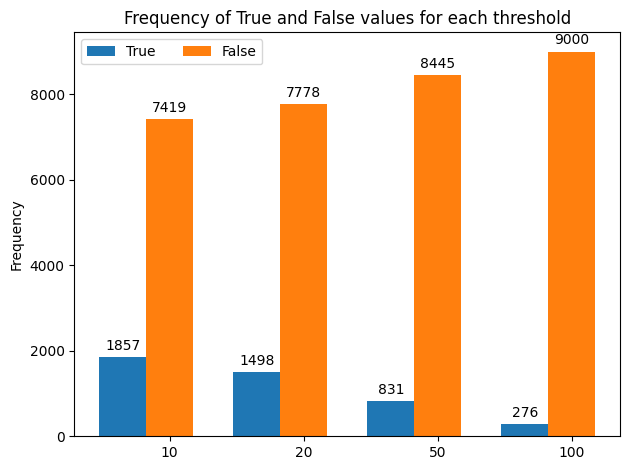

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Underdog'] = df.apply(checkifUnderdogwins, axis=1, args=(threshold,))
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


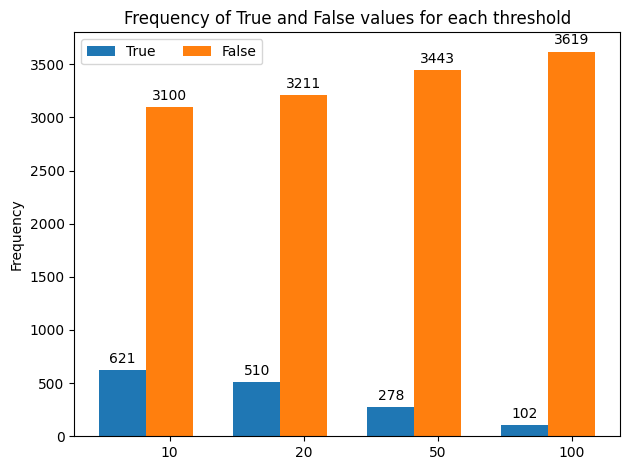

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/3480673211.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout for better spacing


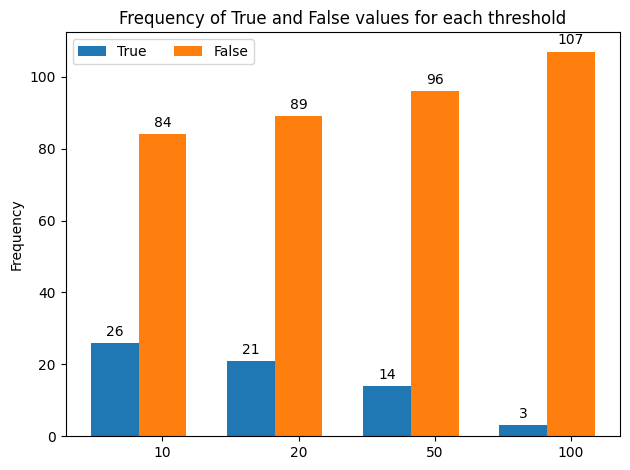

In [36]:
tier = createplot(df_tier,thresholds)
s_tier = createplot(df_stier,thresholds)
hidden = createplot(dfh,thresholds)



In [37]:
for i in range(4):
    und.loc[('Normal', 'Winrate')][i] = (tier[i][0]/(tier[i][0]+tier[i][1]) * 100).round(2)
    und.loc[('s-tier', 'Winrate')][i] = (s_tier[i][0]/(s_tier[i][0]+s_tier[i][1]) * 100).round(2)
    und.loc[('hidden', 'Winrate')][i] = (hidden[i][0]/(hidden[i][0]+hidden[i][1]) * 100).round(2)
#clearly indicate in the dataframe that the values are percentages
und = und.astype(str) + '%'
und

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/1289737023.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  und.loc[('Normal', 'Winrate')][i] = (tier[i][0]/(tier[i][0]+tier[i][1]) * 100).round(2)
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/1289737023.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  und.loc[('s-tier', 'Winrate')][i] = (s_tier[i][0]/(s_tier[i][0]+s_tier[i][1]) * 100).round(2)
/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/1289737023.py:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, 

,,10,20,50,100
Tier,Attribute,,,,
Normal,Winrate,20.02%,16.15%,8.96%,2.98%
s-tier,Winrate,16.69%,13.71%,7.47%,2.74%
hidden,Winrate,23.64%,19.09%,12.73%,2.73%


# Summarized Statistics


### Logistic Regresion

# data preprocessing

## Threshold 10


In [38]:

from sklearn.linear_model import LogisticRegression



In [39]:
def createUnderdog(df,threshold):
    df['Underdog'] = df.apply(checkifUnderdogwins, axis=1, args=(threshold,))
        


In [40]:
dfh

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,s-tier,hidden,Underdog
0,Hidden Cup,222,7,1440.0,K.O. Phase,1,1,DauT,2077,1,2,miguel,1984,3,True,True,False
1,Hidden Cup,223,7,1440.0,K.O. Phase,1,27,Nicov,2102,3,31,TaToH,2154,1,True,True,False
2,Hidden Cup,224,7,1440.0,K.O. Phase,1,19,Yo,2153,2,3,RiuT,2207,3,True,True,False
3,Hidden Cup,225,7,1440.0,K.O. Phase,1,5,F1Re,2071,3,35,vivi,2072,1,True,True,False
12,Hidden Cup 2,1312,88,10200.0,K.O. Phase,1,19,Yo,2140,3,31,TaToH,2180,2,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Hidden Cup 5,13355,674,70624.0,Finale,4,28,Hera,2523,4,25,Liereyy,2399,0,True,True,False
290,Hidden Cup Türkiye,13514,689,NaN,Finale,4,195,Kasva,2101,5,886,Dr.Kozmonot,2052,3,True,True,False
294,Hidden Cup Italia,5239,284,947.0,Bronze-Match,3,503,pete_martell,1990,2,446,Kamigawa,1989,3,True,True,False
295,Hidden Cup 5,13354,674,70624.0,Bronze-Match,3,14,ACCM,2379,1,29,TheViper,2446,3,True,True,False


In [41]:
df_tier['hidden'] = False
df_tier

/var/folders/d5/0lmbb5vn4dx025fyzx18kp5h0000gn/T/ipykernel_2630/507540348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tier['hidden'] = False


,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier,hidden
0,Arabia Invitational,1,15,3000.0,Group Stage,1,29,TheViper,2282,3,18,St4rk,2051,2,False,False,False
1,Arabia Invitational,2,15,3000.0,Group Stage,1,50,Zuppi,2039,3,28,Hera,1999,2,False,False,False
2,Arabia Invitational,3,15,3000.0,Group Stage,1,35,vivi,1992,2,54,yinghua,2054,3,False,False,False
3,Arabia Invitational,4,15,3000.0,Group Stage,1,29,TheViper,2276,3,50,Zuppi,2043,2,False,False,False
4,Arabia Invitational,5,15,3000.0,Group Stage,1,18,St4rk,2057,3,35,vivi,1993,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,NAC CORP,13313,673,NaN,Semi-Finals (Winner Bracket),1,1049,Nahuel05_,2034,2,1319,Parawhas,1971,0,False,False,False
12993,Swidden Cup,13447,685,NaN,Semi-Finals (Winner Bracket),1,1635,Yakul,1900,1,1636,Kr1lle,1900,3,False,False,False
12994,Swidden Cup,13448,685,NaN,Semi-Finals (Winner Bracket),1,65,Spaden,1951,2,731,mratin,1983,3,False,False,False
12995,India 1v1 Cup,13500,686,NaN,Semi-Finals (Winner Bracket),1,603,The_Dragonstar,2147,2,1637,Ass_Kickerwa,1904,0,False,False,False


In [42]:
df_stier

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,Underdog,s-tier,hidden
50,Nili's Apartment Cup 1,156,6,2500.0,Group Stage,1,31,TaToH,2186,1,29,TheViper,2322,4,False,True,False
51,Nili's Apartment Cup 1,157,6,2500.0,Group Stage,1,30,JorDan_23,2165,1,24,MbL,2071,4,False,True,False
52,Nili's Apartment Cup 1,158,6,2500.0,Group Stage,1,25,Liereyy,2128,4,1,DauT,2131,1,False,True,False
53,Nili's Apartment Cup 1,159,6,2500.0,Group Stage,1,24,MbL,2088,2,25,Liereyy,2140,4,False,True,False
54,Nili's Apartment Cup 1,160,6,2500.0,Group Stage,1,1,DauT,2119,0,31,TaToH,2179,4,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833,RMS Cup 2,8260,405,18400.0,Quarter-Finals (Winner Bracket),1,28,Hera,2353,3,30,JorDan_23,2302,1,False,True,False
12915,World Cyber Games 2002,2097,136,43000.0,Semi-Finals (Winner Bracket),1,386,Play_Boys,2023,1,274,Chunyu,2033,0,False,True,False
12916,World Cyber Games 2002,2098,136,43000.0,Semi-Finals (Winner Bracket),1,371,RIP_DREAMS,2010,0,210,Halen,2050,1,False,True,False
12917,World Cyber Games 2001,2172,142,35000.0,Semi-Finals (Winner Bracket),1,60,Chris,2023,0,373,IamKmkm,2017,1,False,True,False


In [43]:
data = pd.concat((dfh,df_stier,df_tier))
data

,name,id,tournament_id,prizemoney,Knockout_stage,Knockout_stage_importance,player_1_id,player_1_name,elo_player_1,score_1,player_2_id,player_2_name,elo_player_2,score_2,s-tier,hidden,Underdog
0,Hidden Cup,222,7,1440.0,K.O. Phase,1,1,DauT,2077,1,2,miguel,1984,3,True,True,False
1,Hidden Cup,223,7,1440.0,K.O. Phase,1,27,Nicov,2102,3,31,TaToH,2154,1,True,True,False
2,Hidden Cup,224,7,1440.0,K.O. Phase,1,19,Yo,2153,2,3,RiuT,2207,3,True,True,False
3,Hidden Cup,225,7,1440.0,K.O. Phase,1,5,F1Re,2071,3,35,vivi,2072,1,True,True,False
12,Hidden Cup 2,1312,88,10200.0,K.O. Phase,1,19,Yo,2140,3,31,TaToH,2180,2,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,NAC CORP,13313,673,NaN,Semi-Finals (Winner Bracket),1,1049,Nahuel05_,2034,2,1319,Parawhas,1971,0,False,False,False
12993,Swidden Cup,13447,685,NaN,Semi-Finals (Winner Bracket),1,1635,Yakul,1900,1,1636,Kr1lle,1900,3,False,False,False
12994,Swidden Cup,13448,685,NaN,Semi-Finals (Winner Bracket),1,65,Spaden,1951,2,731,mratin,1983,3,False,False,False
12995,India 1v1 Cup,13500,686,NaN,Semi-Finals (Winner Bracket),1,603,The_Dragonstar,2147,2,1637,Ass_Kickerwa,1904,0,False,False,False


In [44]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

In [45]:
df = data.copy()
df.drop(['Underdog'], axis=1, inplace=True)
df.to_csv('partidosAoE.csv')

In [46]:
data.drop(['name','id','tournament_id','player_1_id','player_1_name','score_1','player_2_id','player_2_name','score_2',], axis=1,inplace=True)
data

,prizemoney,Knockout_stage,Knockout_stage_importance,elo_player_1,elo_player_2,s-tier,hidden,Underdog
0,1440.0,K.O. Phase,1,2077,1984,True,True,False
1,1440.0,K.O. Phase,1,2102,2154,True,True,False
2,1440.0,K.O. Phase,1,2153,2207,True,True,False
3,1440.0,K.O. Phase,1,2071,2072,True,True,False
4,10200.0,K.O. Phase,1,2140,2180,True,True,False
...,...,...,...,...,...,...,...,...
13102,NaN,Semi-Finals (Winner Bracket),1,2034,1971,False,False,False
13103,NaN,Semi-Finals (Winner Bracket),1,1900,1900,False,False,False
13104,NaN,Semi-Finals (Winner Bracket),1,1951,1983,False,False,False
13105,NaN,Semi-Finals (Winner Bracket),1,2147,1904,False,False,False


In [47]:
data['prizemoney'] = data['prizemoney'].replace(np.nan,0)
data

,prizemoney,Knockout_stage,Knockout_stage_importance,elo_player_1,elo_player_2,s-tier,hidden,Underdog
0,1440.0,K.O. Phase,1,2077,1984,True,True,False
1,1440.0,K.O. Phase,1,2102,2154,True,True,False
2,1440.0,K.O. Phase,1,2153,2207,True,True,False
3,1440.0,K.O. Phase,1,2071,2072,True,True,False
4,10200.0,K.O. Phase,1,2140,2180,True,True,False
...,...,...,...,...,...,...,...,...
13102,0.0,Semi-Finals (Winner Bracket),1,2034,1971,False,False,False
13103,0.0,Semi-Finals (Winner Bracket),1,1900,1900,False,False,False
13104,0.0,Semi-Finals (Winner Bracket),1,1951,1983,False,False,False
13105,0.0,Semi-Finals (Winner Bracket),1,2147,1904,False,False,False


In [48]:
data['s-tier'] = data['s-tier'].apply(lambda x: 1 if x else 0)
data['hidden'] = data['hidden'].apply(lambda x: 1 if x else 0)
data['Underdog'] = data['Underdog'].apply(lambda x: 1 if x else 0)
data

,prizemoney,Knockout_stage,Knockout_stage_importance,elo_player_1,elo_player_2,s-tier,hidden,Underdog
0,1440.0,K.O. Phase,1,2077,1984,1,1,0
1,1440.0,K.O. Phase,1,2102,2154,1,1,0
2,1440.0,K.O. Phase,1,2153,2207,1,1,0
3,1440.0,K.O. Phase,1,2071,2072,1,1,0
4,10200.0,K.O. Phase,1,2140,2180,1,1,0
...,...,...,...,...,...,...,...,...
13102,0.0,Semi-Finals (Winner Bracket),1,2034,1971,0,0,0
13103,0.0,Semi-Finals (Winner Bracket),1,1900,1900,0,0,0
13104,0.0,Semi-Finals (Winner Bracket),1,1951,1983,0,0,0
13105,0.0,Semi-Finals (Winner Bracket),1,2147,1904,0,0,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:,data.columns!='Underdog'],data['Underdog'],test_size=0.2,random_state=1562)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler(feature_range=(0,0.1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

ValueError: could not convert string to float: 'Quarter-Finals'

In [ ]:
log = LogisticRegression(max_iter=3000)
log.fit(x_train,y_train)


LogisticRegression(max_iter=3000)

In [ ]:
coeff = log.coef_
inter = log.intercept_
print("equation is y = ",coeff[0][0],"*x1 + ",coeff[0][1],"*x2 + ",coeff[0][2],"*x3 + ",coeff[0][3],"*x4 + ",coeff[0][4],"*x5 + ",coeff[0][5],"*x6 + ",inter[0])

equation is y =  -0.07674273591870447 *x1 +  0.8745566001328267 *x2 +  1.9398001683060209 *x3 +  6.428265643427592 *x4 +  -2.0364566124248267 *x5 +  0.3485397769906768 *x6 +  -2.8948831849120227


In [ ]:
coeff
#9352451433857539

array([[-0.07674274,  0.8745566 ,  1.93980017,  6.42826564, -2.03645661,
         0.34853978]])

In [ ]:
from sklearn.metrics import accuracy_score


# Step 1: Use the trained model to make predictions on the test data
y_pred = log.predict(x_test)

# Step 2: Compare the predicted labels with the actual labels
# Step 3: Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Mean accuracy on test data:", accuracy)


Mean accuracy on test data: 0.9352451433857539


In [ ]:
log.score(x_test,y_test)

0.9352451433857539

In [ ]:
ans = log.predict(x_test)
for i in ans:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
cont = 0
for i in y_test:
    if i == 1:
        cont+=1

1 - 140/len(y_test)

0.9352451433857539